# AA LAB 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import scipy.linalg as la
import sklearn.datasets as ds

# Pré processamento de dados

In [3]:
import sklearn.preprocessing as pp
D = ds.load_iris()
X = D.data
y = D.target
X.shape

(150, 4)

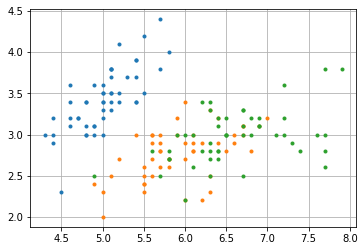

In [4]:
for i in range(3):
    plt.plot(X[y==i,0], X[y==i,1], '.')
plt.axis('scaled')
plt.grid(True)

In [5]:
print(np.mean(X, axis=0))
print(np.std(X, axis=0))

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


## StandardScaler
### Standardize features by removing the mean and scaling to unit variance

Reescala os dados de modo a todas as dimensoes ficarem com media 0 e variancia 1

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]


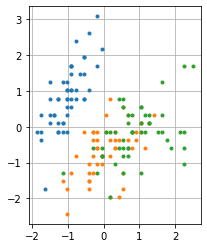

In [6]:
sc = pp.StandardScaler().fit(X)
Xn = sc.transform(X)


for i in range(3):
    plt.plot(Xn[y==i,0], Xn[y==i,1], '.')
plt.axis('scaled')
plt.grid(True)

print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

## RobustScaler

### Scale features using statistics that are robust to outliers

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Usa a mediana e primeiro e ultimos quartil dos dados em vez da média e variância. Util para conjuntos de dados muito esparços

[ 0.03333333  0.11466667 -0.16914286 -0.06711111]
[0.63484715 0.86882194 0.50268688 0.50646175]


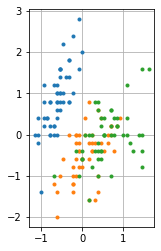

In [7]:
rs = pp.RobustScaler().fit(X)
Xn = rs.transform(X)

for i in range(3):
    plt.plot(Xn[y==i,0], Xn[y==i,1], '.')
plt.axis('scaled')
plt.grid(True)

print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

## MinMaxScaler

### Transform features by scaling each feature to a given range.

Escala os dados para que coincidam num intervalo, por defeito entre 0 e 1

[0.4287037  0.44055556 0.46745763 0.45805556]
[0.22925036 0.18100457 0.29820408 0.31653859]


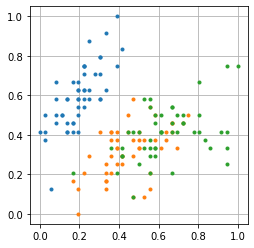

In [8]:
mm = pp.MinMaxScaler().fit(X)
Xn = mm.transform(X)

for i in range(3):
    plt.plot(Xn[y==i,0], Xn[y==i,1], '.')
plt.axis('scaled')
plt.grid(True)

print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

## Normalizer

### Normalize samples individually to unit norm

Cada vetor é reescalado de modo a ter norma 1. Os dados são projetados num circulo ou numa esfera (2 dimensoes ou 3 dimensoes). Aplicavel a dados esparsos (texto) e para a métrica de distância de cosseno.

[0.75140029 0.40517418 0.45478362 0.14107142]
[0.04421945 0.10527109 0.15945216 0.07771647]


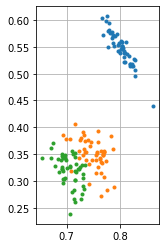

In [9]:
nn = pp.Normalizer().fit(X)
Xn = nn.transform(X)

#Ver a distribuicao dos dados sem calcular norma

for i in range(3):
    plt.plot(Xn[y==i,0], Xn[y==i,1], '.')
plt.axis('scaled')
plt.grid(True)

print(np.mean(Xn, axis=0))
print(np.std(Xn, axis=0))

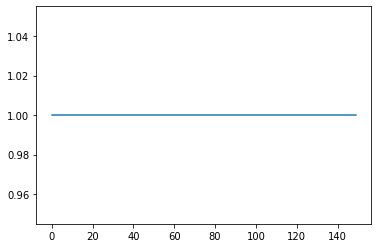

In [10]:
## Ver a norma dos dados
nX = np.sqrt(np.sum(Xn**2 , axis = 1))
plt.plot(nX)

Os dados normalizados não se encontram projetados numa esfera e sim num hiperesfera a 4 dimensoes. 
A seguir vemos as duas primeiras dimensoes dos dados.

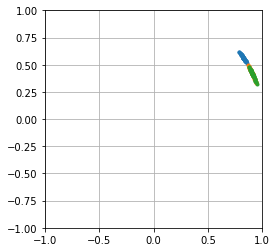

In [11]:
X2 = X[:,:2]
nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)

for i in range(3):
    plt.plot(Xn[y==i,0], Xn[y==i,1], '.')
plt.axis('scaled')
plt.axis([-1,1,-1,1])
plt.grid(True)


Comparando o que acontece se tivesse sido aplicado o standart scaler e não o normalizer teriamos 

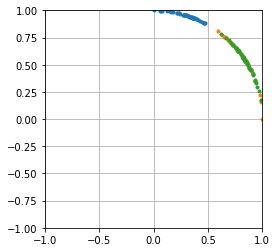

In [12]:
#sc = pp.StandardScaler().fit(X2)
sc = pp.MinMaxScaler().fit(X2)
X2 = sc.transform(X2)

nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)

for i in range(3):
    plt.plot(Xn[y==i,0], Xn[y==i,1], '.')
plt.axis('scaled')
plt.axis([-1,1,-1,1])
plt.grid(True)

## Desenhar uma esfera **(3D)**

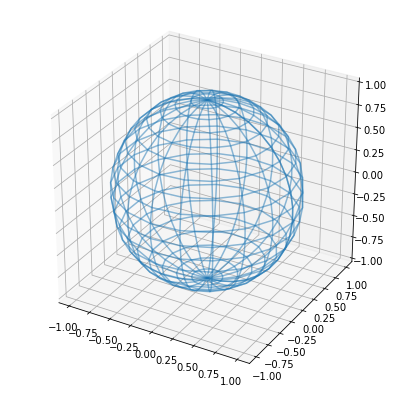

In [13]:
from mpl_toolkits.mplot3d import Axes3D

u,v = np.mgrid[0:2*np.pi:20j , 0:np.pi:20j] # Cria duas grelhas que comecam a 0, vão até 2pi ou pi, com 20 intervalos
gx = np.cos(u)*np.sin(v)
gy = np.sin(u)*np.sin(v)
gz = np.cos(v)

f1 = plt.figure(figsize=(7,7))
ax = f1.add_subplot(111,projection='3d')
ax.plot_wireframe(gx,gy,gz,alpha=.5)


## Fazer plot dos dados anteriores a 3 dimensoes 

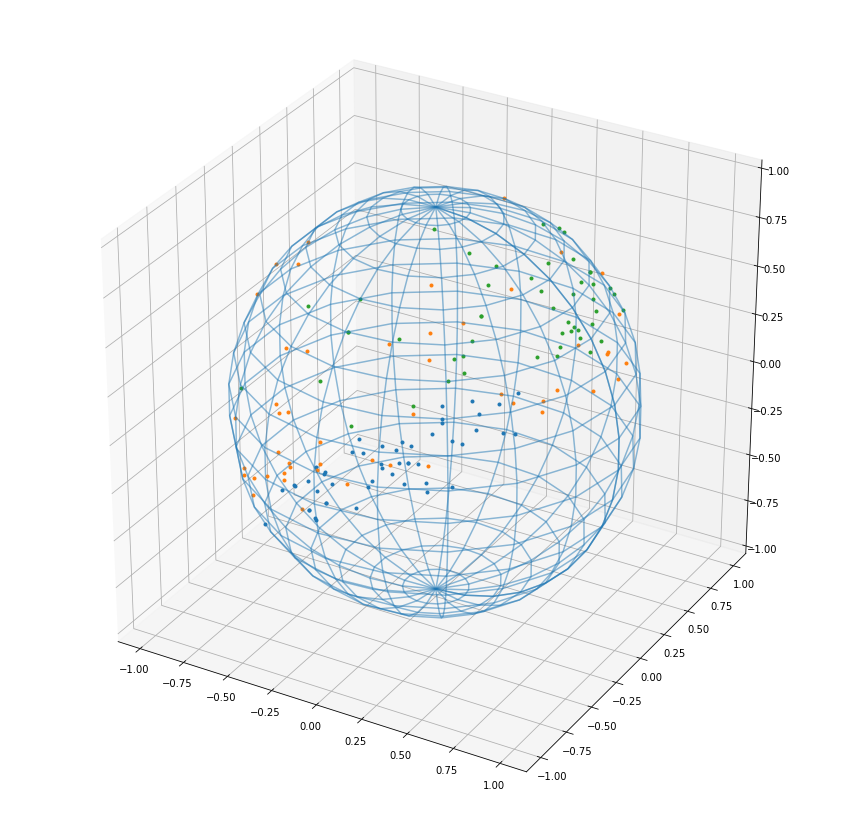

In [14]:
u,v = np.mgrid[0:2*np.pi:20j , 0:np.pi:20j] # Cria duas grelhas que comecam a 0, vão até 2pi ou pi, com 20 intervalos
gx = np.cos(u)*np.sin(v)
gy = np.sin(u)*np.sin(v)
gz = np.cos(v)

f1 = plt.figure(figsize=(15,15))
ax = f1.add_subplot(111,projection='3d')
ax.plot_wireframe(gx,gy,gz,alpha=.5)

X2 = X[:,:3]
sc = pp.StandardScaler().fit(X2)
X2 = sc.transform(X2)

nn = pp.Normalizer().fit(X2)
Xn = nn.transform(X2)

for i in range(3):
    ax.plot(Xn[y==i,0], Xn[y==i,1], Xn[y==i,2],  '.')

## Parte 4, dados MNIST

In [15]:
D = pickle.load(open('../comum/MNISTsmall.p', 'rb'))
D.keys()

X = D ['X']
y = D['trueClass']
X.shape

(784, 15000)

(784, 1500)


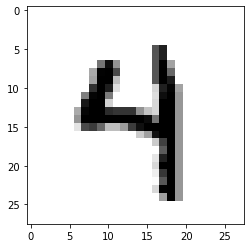

In [16]:
X4 = X[:,y==4]
print(X4.shape)

### Mostrar um digito do MNIST
a = np.reshape(X4[:,130], (28,28))
plt.imshow(a, cmap = 'binary', interpolation=None)


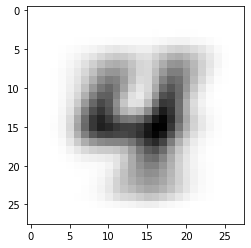

In [17]:
# Mostrar o digito médio 
b = np.reshape(np.mean(X4 , axis = 1), (28,28))
plt.imshow(b, cmap = 'binary', interpolation=None)

## Matrizes de covariancia e correlação

- Mede a correlação entre variaveis (pixeis)
- Correlação é uma média da dependência

[[ 0.70050766 -2.38522946]
 [-2.38522946  8.17842167]]


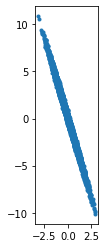

In [18]:
#comparar matriz de correlacao com as matrizes de covariancia através de dados aleatorios
X = X*1.

x = np.random.randn(2,10000)
A = np.random.randn(2,2)*2
x2 = np.dot(A,x) #desta forma a distribuicao não é uniforme logo matriz de cov é diferente de identidade

plt.plot(x2[0,:], x2[1,:], '.')
plt.axis('scaled')
print(np.cov(x2))

(-10.391297398435842, 9.66579142206468, -33.54365036021513, 35.72499196403979)

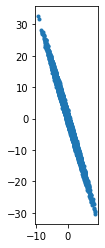

In [19]:
x3 = 3*x2
plt.plot(x3[0,:], x3[1,:], '.')
plt.axis('scaled')

In [20]:
print('Cov x2\n' , np.cov(x2))
print('Cov x3\n' ,np.cov(x3))
## A escala dos dados influencia muito a matriz de cov

print('Cor x2\n' , np.corrcoef(x2))
print('Cor x3\n' , np.corrcoef(x3))

# A matriz dos coeficientes de correlacao é independente da escala

Cov x2
 [[ 0.70050766 -2.38522946]
 [-2.38522946  8.17842167]]
Cov x3
 [[  6.30456898 -21.4670651 ]
 [-21.4670651   73.60579499]]
Cor x2
 [[ 1.         -0.99652677]
 [-0.99652677  1.        ]]
Cor x3
 [[ 1.         -0.99652677]
 [-0.99652677  1.        ]]


## Matrizes covariancia e correlacao MNISTsmall

In [22]:
cov = []
for i in range(10):
    cov.append( np.cov(X[:, y==i]) ) 
C0, C1, C2, C3, C4, C5, C6, C7, C8 , C9 = cov

corrcoef = []
for i in range(10):
    corrcoef.append( np.corrcoef(X[:, y==i]) ) 
S0, S1, S2, S3, S4, S5, S6, S7, S8 , S9 = cov

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(-0.5, 783.5, 783.5, -0.5)

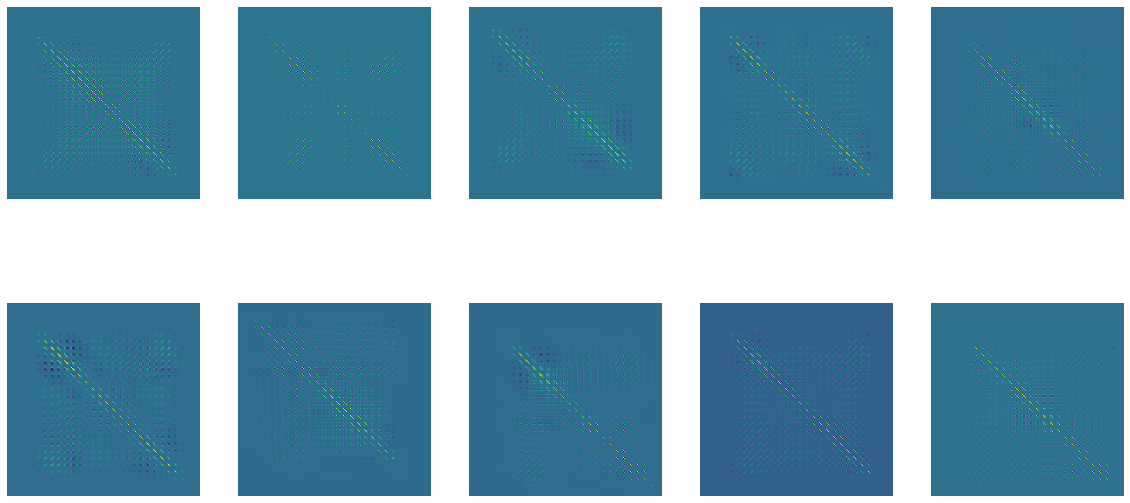

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(251)
plt.imshow(C0)
plt.axis('off')
plt.subplot(252)
plt.imshow(C1)
plt.axis('off')
plt.subplot(253)
plt.imshow(C2)
plt.axis('off')
plt.subplot(254)
plt.imshow(C3)
plt.axis('off')
plt.subplot(255)
plt.imshow(C4)
plt.axis('off')
plt.subplot(256)
plt.imshow(C5)
plt.axis('off')
plt.subplot(257)
plt.imshow(C6)
plt.axis('off')
plt.subplot(258)
plt.imshow(C7)
plt.axis('off')
plt.subplot(259)
plt.imshow(C8)
plt.axis('off')
plt.subplot(2,5,10)
plt.imshow(C9)
plt.axis('off')



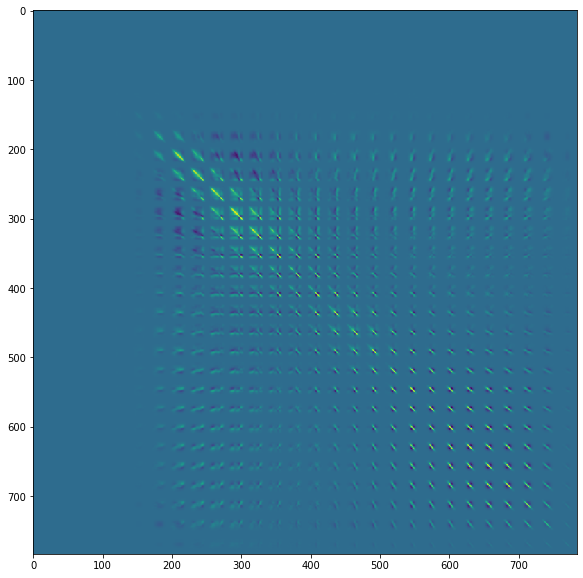

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(S7)


De notar que existem repeticoes de padrão de 28 em 28 valores. Devido simplesmente ao facto de as imagens ter a forma de 28x28 pixeis. Assim ao andar 28 pixeis, vou estar no pixel imediatamente ao lado que irá ter um valor semelhante

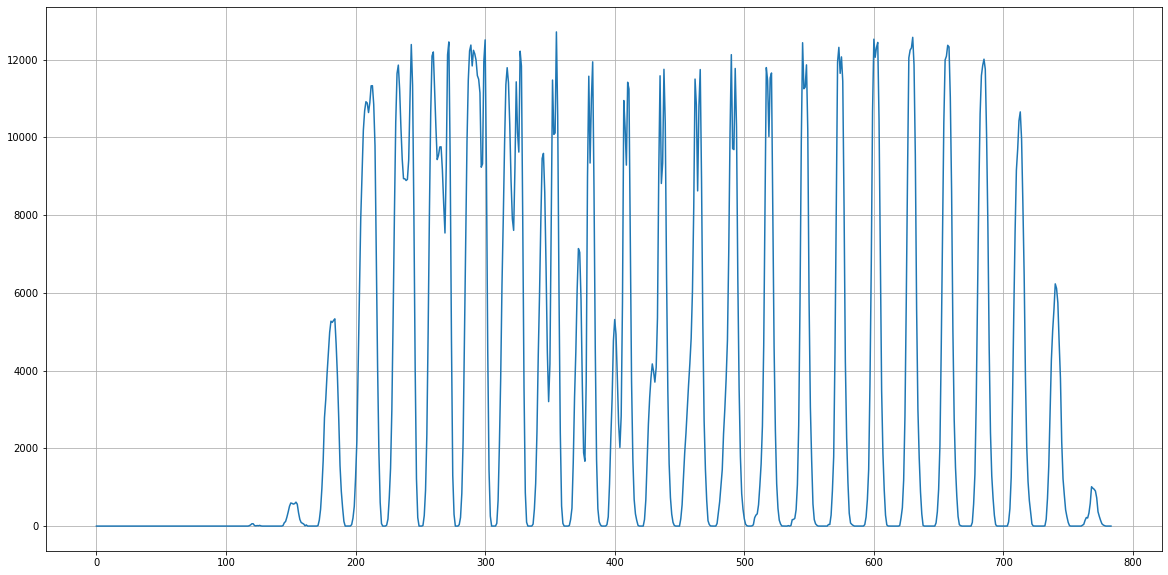

In [25]:
v = np.diag(C7)
plt.figure(figsize=(20,10))
plt.plot(v)
plt.grid(True)

Existem diversos valores a 0 ou NaN, para determinar quais são fazemos

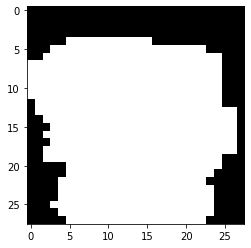

In [26]:
z0 = (v==0)*1
plt.imshow(1-z0.reshape((28,28)), cmap = 'gray')

Para ver todos os valores não zero, em todas as classes

Text(0.5, 1.0, '9')

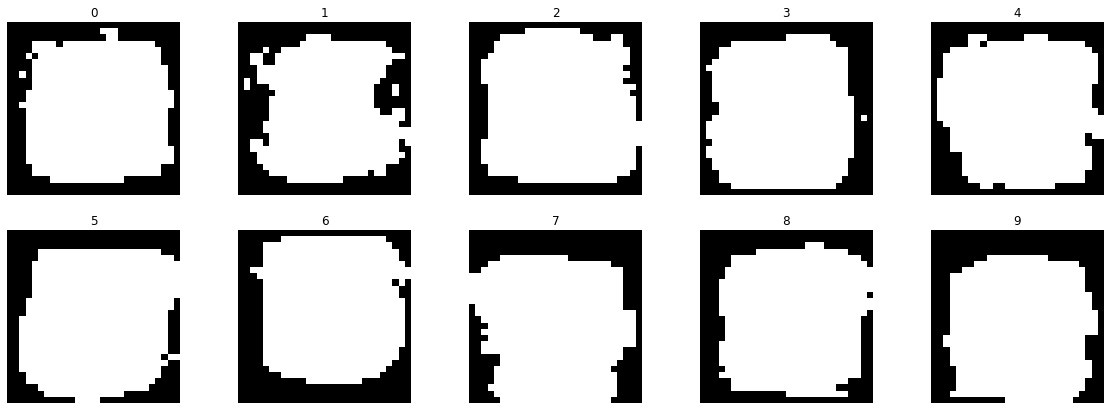

In [27]:
zeros = []
for C in cov:
    zeros.append((np.diag(C)!=0).reshape((28,28)))

z0, z1, z2 , z3, z4, z5, z6, z7 , z8, z9 = zeros

plt.figure(figsize=(20,7))
plt.subplot(2,5,1)
plt.imshow(z0, cmap='gray')
plt.axis('off')
plt.title(0)
plt.subplot(2,5,2)
plt.imshow(z1, cmap='gray')
plt.axis('off')
plt.title(1)
plt.subplot(2,5,3)
plt.imshow(z2, cmap='gray')
plt.axis('off')
plt.title(2)
plt.subplot(2,5,4)
plt.imshow(z3, cmap='gray')
plt.axis('off')
plt.title(3)
plt.subplot(2,5,5)
plt.imshow(z4, cmap='gray')
plt.axis('off')
plt.title(4)
plt.subplot(2,5,6)
plt.imshow(z5, cmap='gray')
plt.axis('off')
plt.title(5)
plt.subplot(2,5,7)
plt.imshow(z6, cmap='gray')
plt.axis('off')
plt.title(6)
plt.subplot(2,5,8)
plt.imshow(z7, cmap='gray')
plt.axis('off')
plt.title(7)
plt.subplot(2,5,9)
plt.imshow(z8, cmap='gray')
plt.axis('off')
plt.title(8)
plt.subplot(2,5,10)
plt.imshow(z9, cmap='gray')
plt.axis('off')
plt.title(9)

Em cada uma das classes, os pixeis a preto são aqueles que **não variam** em todo o dataset
Estas dimensoes irrelevantes, podem atrapalhar o processo de classificação e por isso iremos remover através da analise em componentes principais **(Principal Component Analisys, PCA)**

Mesmo aplicando o preprocessamento, irão continuar a existir dimensoes iguais a 0 pelo que não convem usar somente os Scaler

In [28]:
sc = pp.StandardScaler().fit(X.T)
X2 = sc.transform(X.T).T
print(X2.shape)

(784, 15000)


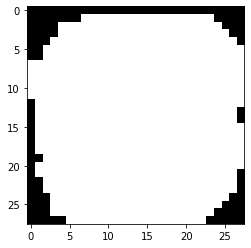

In [29]:
v= np.var(X2, axis=1)
plt.imshow(v.reshape(28,28), cmap='gray')

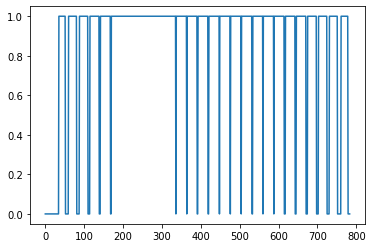

In [30]:
plt.plot(v)

## Analise em componentes principais
É um método não supervisionado - não há classes - Deve ser aplicado a todos os dados (de treino), independentemente das classes


In [31]:
Cx = np.cov(X)
u,W = la.eig(Cx)

In [32]:
print(u.shape)
print(W.shape)

u[:50]

(784,)
(784, 784)


array([330558.51704739+0.j, 238434.37874637+0.j, 207202.87800607+0.j,
       181957.99452673+0.j, 163052.59910849+0.j, 145744.77031844+0.j,
       110779.66975381+0.j,  97394.84286729+0.j,  94612.65326775+0.j,
        78118.82806291+0.j,  72546.00188094+0.j,  71476.88628556+0.j,
        57583.09543118+0.j,  56457.07205009+0.j,  53972.03862309+0.j,
        52227.55432371+0.j,  44561.42324553+0.j,  43847.8165821 +0.j,
        40407.99547434+0.j,  39750.49095025+0.j,  36141.28188955+0.j,
        34783.92335868+0.j,  33031.99009787+0.j,  31638.37435035+0.j,
        30379.34884375+0.j,  29230.87438768+0.j,  27335.93245994+0.j,
        26877.75838241+0.j,  25471.1846494 +0.j,  23652.53919237+0.j,
        22534.55399269+0.j,  21838.96426956+0.j,  20979.74206497+0.j,
        20662.48957833+0.j,  19469.9551524 +0.j,  18479.75314892+0.j,
        17852.09796496+0.j,  16567.22688665+0.j,  16379.44011331+0.j,
        16200.46252671+0.j,  15757.08678695+0.j,  14993.18078533+0.j,
        14702.991511

Os valores proprios vêm em numeros complexos, no entanto a parte imaginária é aproxidamente zero em todos, assim sendo podemos ignorar esta parte.

Estes valores não se encontram ordenados, pelo que é necessario ordenar para obter uma boa estimativa.

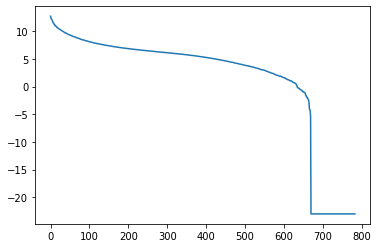

In [33]:
u = u.real
u[:50]

idx = np.argsort(-u) # Ordenar por ordem ascendente
u = u[idx]
W = W[:,idx].real
plt.plot(np.log(u+1e-10)) # o '+1e-10' serve para manter a forma dos valores e evitar o divide by zero error

In [34]:
np.sum(u<1e-10)

114

De modo a ignorar dimensoes irrelevantes (114) fazemos 

In [35]:
un = u/np.sum(u)
L = np.cumsum(un)
print(np.sum(L<=0.99)) # Quantos valores preciso para ter uma reconstrucao fiavel a 99%

326


In [36]:
m = np.mean(X, axis=1)[:,np.newaxis]
Xn = X-m
W2 = W[:,:50]
Xp = np.dot(W2.T, Xn)
Xr = np.dot(W2,Xp)+m

print(X.dtype)
print(Xp.shape)

float64
(50, 15000)


-64.46284698340064 288.8157982147508


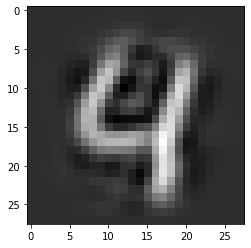

In [36]:
x = Xr[:,7000].reshape((28,28))
plt.imshow(x,cmap='gray')
print(x.min(), x.max())

Os valores já **não estão coompreendidos entre 0 e 255** é necessario normalizar

In [37]:
x = x-x.min()
x = x/x.max()*255

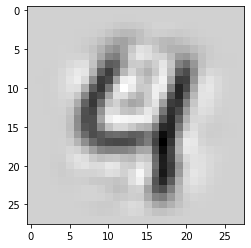

In [38]:
plt.imshow(x.astype('uint8'), cmap='binary')

Aumentando o numero de componentes principais

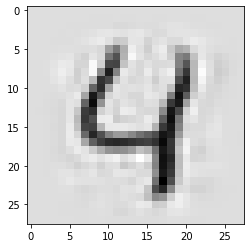

In [39]:
W2 = W[:,:150] #150 componentes principais
Xp = np.dot(W2.T, Xn)
Xr = np.dot(W2,Xp)+m

x = Xr[:,7000].reshape((28,28))
x = x-x.min()
x = x/x.max()*255

plt.imshow(x.astype('uint8'), cmap='binary')

Outra alternativa era fazer um "clamp" aos dados, tudo o que é maior que 255 passa a 255 e os valores menores que 0, passam a 0

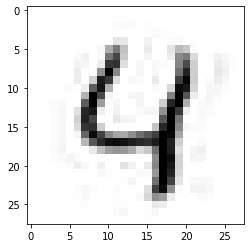

In [40]:
x = Xr[:,7000].reshape((28,28))
x = np.clip(x, 0, 255)
plt.imshow(x.astype('uint8'), cmap='binary')

## Pré processar os dados para classificar com k vizinhos mais próximos

In [41]:
D = pickle.load(open('../comum/MNISTsmall.p', 'rb'))

print(D.keys())
X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:,f1]
X2 = X[:,f2]
y1 = y[f1]
y2 = y[f2]

print(X1.shape, X2.shape)


dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])
(784, 10000) (784, 5000)


In [ ]:
#Extrair os vetores proprios

Cx = np.cov(X1)
u,v = la.eig(Cx)
u=u.real
v=v.real

In [ ]:
#Ordenar por ordem decrescente os valores

idx= np.argsort(-u)
u=u[idx]
V=V[:,idx]
plt.plot(np.log(u+1e-10))

#### Descobrir numero real de dimensoes

Os valores que se aproximam muito de 0 podem ser erros de arredondamento, e não influenciam muito o calculo pelo que podemos assumir que são zero. Como a lista está ordenada por ordem decrescente, podemos apenas aceder aos primeiros N vetores

In [44]:
num_relevantes = np.sum(u>=1e-6)
print(num_relevantes) 

664


In [45]:
W = V[:,:num_relevantes]
m = np.mean(X1, axis=1)[:,np.newaxis]
X1n= X1-m # dados normalizados
X1p= np.dot(W.T, X1n) # dados projetados

X1p.shape

(664, 10000)

#### O desvio padrao é igual á raiz quadrada dos valores próprios

In [46]:
s = np.std(X1p, axis=1)
print(s[:10]) 
print(np.sqrt(u[:10]))

[586.00518804 493.42306958 461.38830872 434.07789728 405.52569402
 387.78533176 335.16926737 317.54195021 310.15556184 282.8773864 ]
[586.03449049 493.44774259 461.41137987 434.09960281 405.54597182
 387.80472248 335.18602709 317.55782849 310.17107078 282.89153133]


### Projetar os dados normalizados de modo a terem variancia igual a 1

In [47]:
Xtmp = (X1p.T/s).T
print(np.std(Xtmp,axis=1))

## OU 

s = np.std(X1p, axis=1)
S = np.diag(1/s)
X1p = np.dot(S,X1p)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [48]:
X2n = X2 - m
X2p = np.dot(S,np.dot(W.T, X2n))

# Classificar com K Vizinhos mais proximos

7.140000000000001


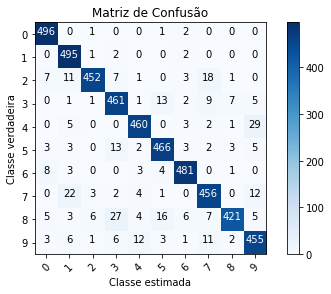

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from plotMatriz import plotMatriz


knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T, y1)
y2e = knn.predict(X2.T)
CM = confusion_matrix(y2,y2e)
plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)

# Comparar os K Vizinhos mais proximos com PCA

7.140000000000001


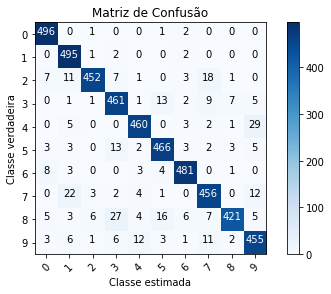

In [50]:
W = V[:,:100] # Escolher os 10 componentes principais
m = np.mean(X1, axis=1)[:, np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)
X2n = X2-m
X2p = np.dot(W.T,X2n)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T, y1)
y2e = knn.predict(X2.T)
CM = confusion_matrix(y2,y2e)
plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)

# Utilizar sklearn para fazer a decomposicao em PCA

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100, whiten=True).fit(X1.T)
X1p = pca.transform(X1.T)

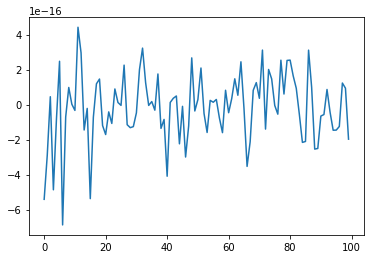

In [52]:
plt.plot(np.mean(X1p, axis=0))

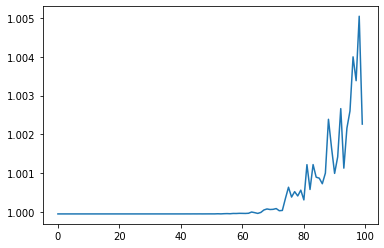

In [53]:
plt.plot(np.std(X1p, axis=0)) ### Valores muito próximos de 1

In [54]:
X2p = pca.transform(X2.T).T

knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T, y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2,y2e)
plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)

ValueError: query data dimension must match training data dimension